<a href="https://colab.research.google.com/github/SlavaKulik/neural_networks/blob/main/practice_3_neurolinks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


learning on dataset iris
training: constant learning-rate
Training set score: 0.960000
Training set loss: 0.317743
training: adam
Training set score: 0.980000
Training set loss: 0.052547

learning on dataset breast_cancer
training: constant learning-rate
Training set score: 0.627417
Training set loss: 0.626550
training: adam
Training set score: 0.961336
Training set loss: 0.177081


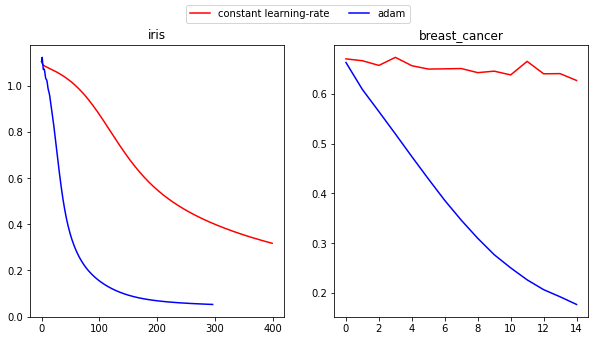

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
import matplotlib.pyplot as plt
 
iris = datasets.load_iris()
breast_cancer = datasets.load_breast_cancer()
 
params = [{'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'activation': 'logistic','solver': 'adam', 'learning_rate_init': 0.01}]
 
labels = ["constant learning-rate",
          "adam"]
 
plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'}]
 
import warnings
from sklearn.exceptions import ConvergenceWarning
 
def plot_on_dataset(X, y, ax, name):
    # для кожного датасету, будуємо графік, який показує метод навчання
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)
 
    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "breast_cancer":
        # цифри є більшими, але збігаються швидше
        max_iter = 15
    else:
        max_iter = 400
 
    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=0,
                            max_iter=max_iter, **param)
 
        # деякі комбінації параметрів не збігаються, тому на графіках 
        #ігноруються
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                    module="sklearn")
            mlp.fit(X, y)
 
        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
data_sets = [(iris.data, iris.target),
             (breast_cancer.data, breast_cancer.target)]
 
for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'breast_cancer']):
    plot_on_dataset(*data, ax=ax, name=name)
 
fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()
